In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## 로지스틱 회귀
* 주로 분류를 하기 위한 알고리즘
* 예0/아니오1 등의 이진분류에 많이 사용
* 의료,통신,데이터마이닝 분야의 회귀/분류를 위한 예측모델로 활용

## 선형회귀의 함정
* 곤충질량(g)에 따라 암수구분하는 모델 생성
* 0:암컷, 1:수컷

In [4]:
wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

### 시각화

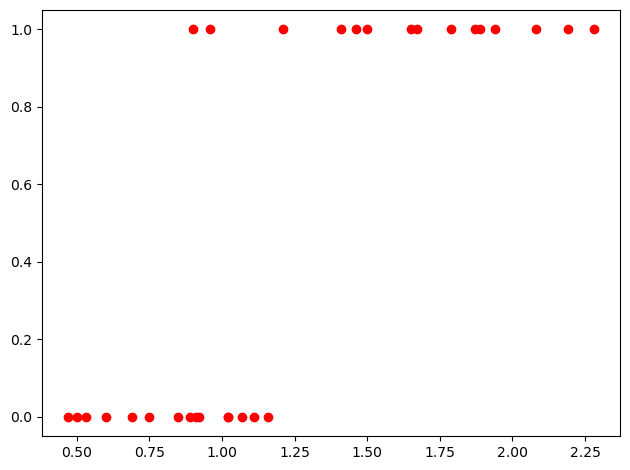

In [5]:
plt.plot(wght, spcs, 'ro')
plt.tight_layout()

### 선형회귀 분석

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
# 모델 학습 : fit(독립변수, 종속변수)
lr = LinearRegression()
wght2 = np.array(wght).reshape(-1, 1)  # 배열 구조 변경
lr.fit(wght2, spcs)

LinearRegression()

In [8]:
# 회귀계수 확인
# 기울기, 절편
lr.coef_, lr.intercept_

(array([0.74825276]), -0.43007818056050295)

In [9]:
# 예측 평가 :  r2_score(실제값, 예측값)
pred = lr.predict(wght2)
r2_score(spcs, pred)

0.6140660982944375

### 분석결과 시각화

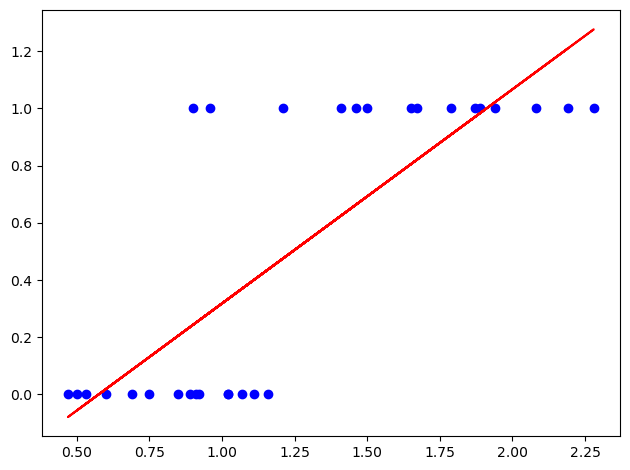

In [10]:
plt.plot(wght, spcs, 'bo')
plt.plot(wght, pred, 'r-')
plt.tight_layout()

## 종속변수가 범주형인 경우
* 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
   + $ y = ax + b $
* 즉, 우변값의 범위는 '-무한대 ~ +무한대'이지만, 좌변값의 범위는 '0 ~ 1'임
* 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대~+무한대'로
  하려면 적절한 변환함수가 필요
    + 로짓함수를 이용해서 변환함
    + ### $  f(x) = \frac {1} {1 + e^{-x}} $

### 로짓함수 정의

In [14]:
def logistic(x, a, b):
    yy = 1 / (1 + np.exp(-(a*x + b)))
    return yy
# w는 가중치..

### 로짓함수 변환 후 시각화

In [15]:
xx = np.linspace(0.45, 2.30, 50)
yy = logistic(xx, 8, -10)

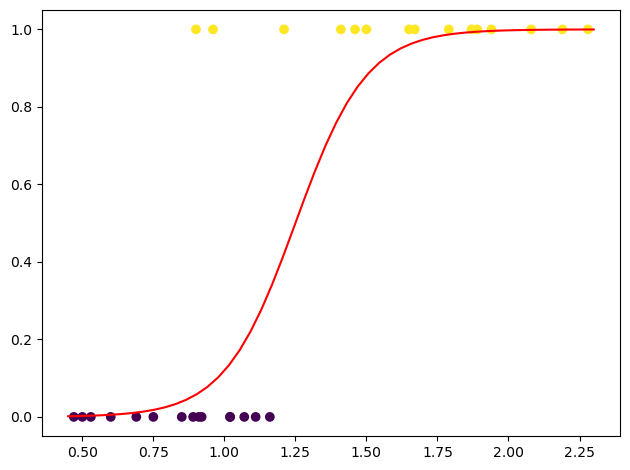

In [17]:
plt.scatter(wght, spcs, c=spcs)
plt.plot(xx, yy, 'r-')
plt.tight_layout()

### sklearn의 logistic regression 으로 분석

In [18]:
### target 변수의 분포 확인
pd.Series(spcs).value_counts()

1    15
0    15
Name: count, dtype: int64

In [26]:
# train, test로 나눔
X = np.array(wght)
y = np.array(spcs)
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7,
                random_state=2309251000, stratify=y)

In [49]:
# 모델 학습 및 테스트
lrclf = LogisticRegression()
lrclf.fit(X_train.reshape(-1, 1), y_train)
lrclf.score(X_train.reshape(-1, 1), y_train)  # 훈련시 평가

0.9523809523809523

In [53]:
pred = lrclf.predict(X_test.reshape(-1, 1))
accuracy_score(y_test, pred)

0.8888888888888888

In [54]:
confusion_matrix(y_test, pred)

array([[5, 0],
       [1, 3]])

In [55]:
precision_score(y_test, pred), recall_score(y_test, pred)

(1.0, 0.75)

### 결정 경계 시각화

In [28]:
# 머신러닝 확장 시켜주는 라이브러리들이 있음
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.datasets import make_blobs

In [44]:
# make_blobs를 이용해서 정규분포를 따르는 가상데이터 생성
# n_samples : 표본수
# centers : 군집수
# cluster_std : 군집의 표준편차 (흩어짐 정도)
X, y = make_blobs(n_samples=100, cluster_std=1.0, centers=2, random_state=2309251015) # 100개의 임의의 데이터를 만듦

In [45]:
X[:5]

array([[ 5.77495443,  6.80414731],
       [-4.99568893, -7.21693861],
       [-4.88215004, -8.30297382],
       [-3.58390345, -6.0555191 ],
       [-4.39208306, -7.8309694 ]])

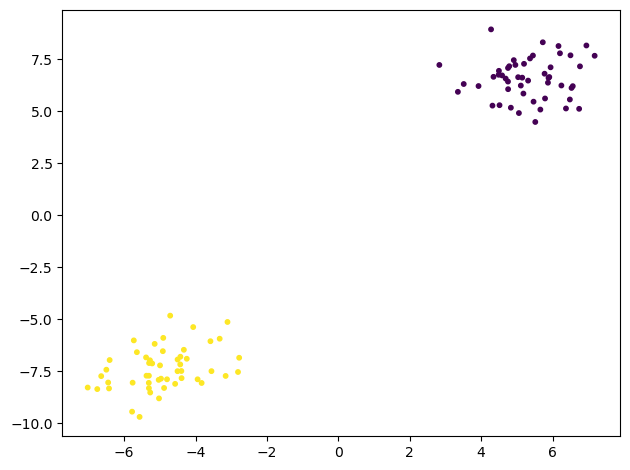

In [46]:
plt.scatter(X[:,0], X[:,1], c=y, s=10)
plt.tight_layout()

In [47]:
lrclf = LogisticRegression()
lrclf.fit(X, y)    # 모의고사 때 썼던 데이터
lrclf.score(X, y)  # 그 데이터를 score에 넣어 학습시킴

1.0

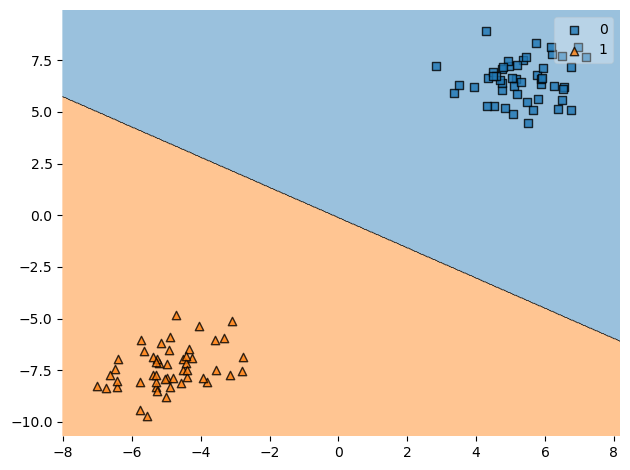

In [48]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=lrclf)   # X는 2차원이어야 함!
plt.tight_layout()